In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os
import joblib
import matplotlib.pyplot as plt

In [33]:
file = open("fichier1.txt", "r", encoding = "utf8")

In [4]:
#store file in list
lines = []
for i in file:
    lines.append(i)

In [5]:
# Convert list to string
data = ""
for i in lines:
    data = ' '. join(lines)

In [6]:
#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space
#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:500]
len(data)

733690

#Implement tokenization and make additional adjustments


In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
# saving the tokenizer for predict function
pickle.dump(tokenizer, open('/content/drive/MyDrive/data/token.pkl', 'wb'))

In [8]:
sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]
len(sequence_data)

131178

In [9]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

7254


In [10]:
sequences = []
for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  131175


array([[   1,  181,  390, 1000],
       [ 181,  390, 1000,    3],
       [ 390, 1000,    3,  298],
       [1000,    3,  298,    4],
       [   3,  298,    4,  946],
       [ 298,    4,  946,   41],
       [   4,  946,   41, 1000],
       [ 946,   41, 1000,   23],
       [  41, 1000,   23,   21],
       [1000,   23,   21,    1]])

In [11]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

X = np.array(X)
y = np.array(y)
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[   1  181  390]
 [ 181  390 1000]
 [ 390 1000    3]
 [1000    3  298]
 [   3  298    4]
 [ 298    4  946]
 [   4  946   41]
 [ 946   41 1000]
 [  41 1000   23]
 [1000   23   21]]
Response:  [1000    3  298    4  946   41 1000   23   21    1]


In [12]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Creating the model


In [13]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             72540     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 7254)              7261254   
                                                                 
Total params: 20382794 (77.75 MB)
Trainable params: 20382794 (77.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
!pip install --upgrade keras

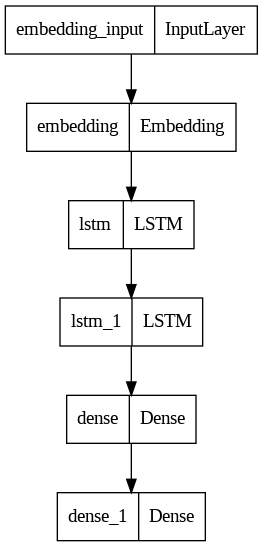

In [15]:
from tensorflow import keras
from keras.utils import plot_model
keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)


# Train the model

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("/content/drive/MyDrive/data/next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001) , metrics= ['accuracy'])
history = model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])
joblib.dump(history, "/content/drive/MyDrive/data/history.pkl")

Epoch 1/70
2050/2050 [==============================] - ETA: 0s - loss: 5.2305 - accuracy: 0.1346
Epoch 1: loss improved from inf to 5.23046, saving model to /content/drive/MyDrive/data/next_words.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2050/2050 [==============================] - 56s 25ms/step - loss: 5.2305 - accuracy: 0.1346
Epoch 2/70
2050/2050 [==============================] - ETA: 0s - loss: 4.9686 - accuracy: 0.1438
Epoch 2: loss improved from 5.23046 to 4.96859, saving model to /content/drive/MyDrive/data/next_words.h5
2050/2050 [==============================] - 47s 23ms/step - loss: 4.9686 - accuracy: 0.1438
Epoch 3/70
2050/2050 [==============================] - ETA: 0s - loss: 4.7682 - accuracy: 0.1528
Epoch 3: loss improved from 4.96859 to 4.76817, saving model to /content/drive/MyDrive/data/next_words.h5
2050/2050 [==============================] - 47s 23ms/step - loss: 4.7682 - accuracy: 0.1528
Epoch 4/70
2050/2050 [==============================] - ETA: 0s - loss: 4.5965 - accuracy: 0.1602
Epoch 4: loss improved from 4.76817 to 4.59654, saving model to /content/drive/MyDrive/data/next_words.h5
2050/2050 [==============================] - 52s 25ms/step - loss: 4.5965 - accuracy: 0.1602
Epoch 5/70
2050/

['/content/drive/MyDrive/data/history.pkl']

# Let’s predict

In [27]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('/content/drive/MyDrive/data/next_words.h5')
tokenizer = pickle.load(open('/content/drive/MyDrive/data/token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break

  return predicted_word


In [28]:

text = 'In the first'
text = text.split(" ")
text_generate = text.copy()

for i in range(30):
  text = text[-3:]
  word = Predict_Next_Words(model, tokenizer, text)
  text.append(word)
  text_generate.append(word)

res  = ' '.join(text_generate)



1/1 [==============================] - 0s 32ms/step


In [29]:
print(res ,end=' ')

In the first place she persisted in disbelieving the whole of his history and is quite ignorant of the truth of it all and saw in the motion of his lips the easy 

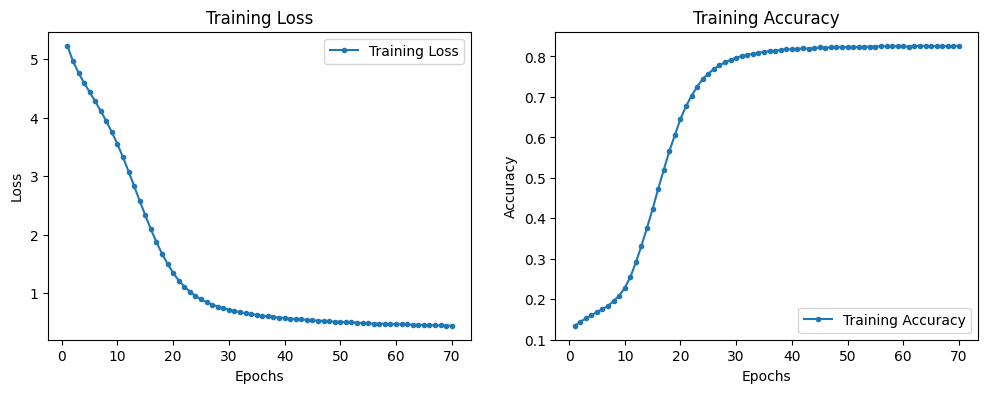

In [32]:
# Extract training loss and accuracy from the history
history = joblib.load("/content/drive/MyDrive/data/history.pkl")
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', marker='.')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy', marker='.')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
